In [2]:
## Project Dependencies 
# Anacodna with tensorflow
# pandas 
# praw for scraping reddit posts
# beautifulsup4 for supportgroup
# another web scrping tool is call selenium

import bs4
import pandas as pd
from RedditClientInfo import Login

In [3]:
reddit_client = Login.LoginReddit()
depression_posts = reddit_client.subreddit('Depression').hot(limit=3000)
happy_posts = reddit_client.subreddit('Happy').hot(limit=1000)
suicide_posts = reddit_client.subreddit('SuicideWatch').hot(limit=1000)
anxiety_posts = reddit_client.subreddit('Anxiety').hot(limit=1000)
list_of_subreddit_posts = [happy_posts, suicide_posts, depression_posts, anxiety_posts]

In [4]:
## post.is_self == True mean that is a text base post
happy_text = []
depression_text = []
anxiety_text  = []
suicide_text = []
happy_label  = []
depression_label = []
anxiety_label = []
suicide_label = []
for post in happy_posts:
    if post.is_self:
        current_post = post.title +"\n\n" +post.selftext 
        happy_text.append(current_post)
        happy_label.append("happy")
for post in suicide_posts:
    if post.is_self:
        current_post = post.title +"\n\n" +post.selftext 
        suicide_text.append(current_post)
        suicide_label.append("suicidal")
for post in depression_posts:
    if post.is_self:
        current_post = post.title +"\n\n" +post.selftext 
        depression_text.append(current_post)
        depression_label.append("depression")
for post in anxiety_posts:
    if post.is_self:
        current_post = post.title +"\n\n" +post.selftext 
        anxiety_text.append(current_post)
        anxiety_label.append("anxiety")

 


In [5]:
happy_text = happy_text[2:]
happy_label = happy_label[2:]

suicide_text = suicide_text[2:]
suicide_label = suicide_label[2:]

depression_text = depression_text[2:]
depression_label = depression_label[2:]

anxiety_text = anxiety_text[2:]
anxiety_label =  anxiety_label[2:]

In [6]:
all_text = happy_text + suicide_text + depression_text + anxiety_text
labels = happy_label + suicide_label + depression_label + anxiety_label

In [7]:
all_posts ={"text": all_text, "label": labels  }

In [8]:
from pandas import DataFrame
df = DataFrame(all_posts,columns= ['text', 'label'])
df.head()

,text,label
0,"After months and months of struggling, I saved...",happy
1,I finally got over my breakup and am starting ...,happy
2,"I know it may not seem like anything special, ...",happy
3,My Sister's Been Clean for A WHOLE YEAR today!...,happy
4,I felt genuinely happy today for the first tim...,happy


In [9]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df)
sentiment_category= ["postive", "anxiety", "depression", "suicide"]

In [10]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [11]:
happy_data_set =  df[df["label"]== "happy"]
anxiety_data_set = df[df["label"]== "anxiety"]
depression_data_set =df[df["label"]== "depression"]
suicide_data_set =df[df["label"]== "suicidal"]
print(suicide_data_set.head())

                                                  text     label
210  “Suicide is a permanent solution to a temporar...  suicidal
211  I failed Math and i think i'll kill myself\n\n...  suicidal
212  If I blow my brains out everyone will just for...  suicidal
213  Bad experience with hotline: 1-800-784-2433 (1...  suicidal
214  When you have no interest in being alive but y...  suicidal


After months and months of struggling, I saved $1,000 for an emergency fund. Finally.

I finally managed to put together a thousand dollars. I'm so ecstatic. I have BPD and ADHD, and those two things combined made it complete hell to try and save money. 

I feel so accomplished and happy and wanted to share the joy and hope that you can do it too if you struggle.


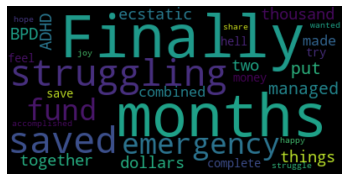

In [12]:
text = happy_data_set['text'][0]
print(text)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

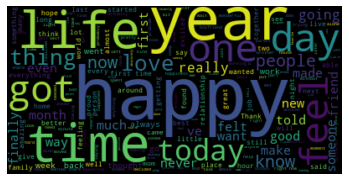

In [13]:
all_words = ''
for happy_text in happy_data_set['text']:
    all_words += happy_text
wordcloud = WordCloud().generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()    

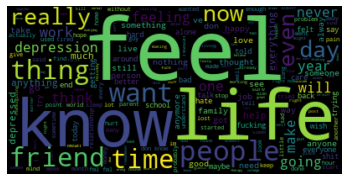

In [14]:
all_words = ''
for text in depression_data_set['text']:
    all_words += text
wordcloud = WordCloud().generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()    

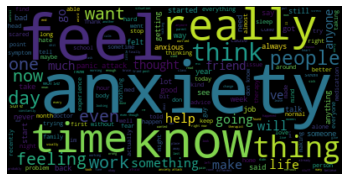

In [15]:
all_words = ''
for text in anxiety_data_set['text']:
    all_words += text
wordcloud = WordCloud().generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()   

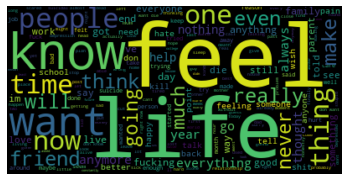

In [23]:
all_words = ''
for text in suicide_data_set['text']:
    all_words += text
wordcloud = WordCloud().generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()  

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras

from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding,Dropout, LSTM
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import re



In [33]:
print(df[ df['label'] == 'happy'].size)
print(df[ df['label'] == 'depression'].size)
print (df)
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['text'].values)


X = tokenizer.texts_to_sequences(df['text'].values)

X = pad_sequences(X)



420
1900
                                                   text    label
0     After months and months of struggling, I saved...    happy
1     I finally got over my breakup and am starting ...    happy
2     I know it may not seem like anything special, ...    happy
3     My Sister's Been Clean for A WHOLE YEAR today!...    happy
4     I felt genuinely happy today for the first tim...    happy
...                                                 ...      ...
3139  Anxiety rant\n\nI think I have social anxiety....  anxiety
3140  Just realizing I have anxiety...not sure how t...  anxiety
3141  I'm almost there\n\nI graduate in three weeks....  anxiety
3142  Second day on Buspirone, feeling really tired ...  anxiety
3143  Anxiety is worse in the morning so let’s get t...  anxiety

[3144 rows x 2 columns]


In [34]:
embed_dim = 128
lstm_out = 196


model = keras.Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length =X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out))
model.add(Dense(4,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 3149, 128)         256000    
_________________________________________________________________
dropout (Dropout)            (None, 3149, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 4)                 788       
Total params: 511,588
Trainable params: 511,588
Non-trainable params: 0
_________________________________________________________________
None


In [35]:


Y = pd.get_dummies(df['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)



(2106, 3149) (2106, 4)
(1038, 3149) (1038, 4)


In [36]:


batch_size = 32
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 1)



Train on 2106 samples
Epoch 1/7
2106/2106 [==============================] - 14s 6ms/sample - loss: 1.2700 - accuracy: 0.3485
Epoch 2/7
2106/2106 [==============================] - 11s 5ms/sample - loss: 1.0591 - accuracy: 0.5128
Epoch 3/7
2106/2106 [==============================] - 11s 5ms/sample - loss: 0.8090 - accuracy: 0.6686
Epoch 4/7
2106/2106 [==============================] - 11s 5ms/sample - loss: 0.6307 - accuracy: 0.7555
Epoch 5/7
2106/2106 [==============================] - 11s 5ms/sample - loss: 0.4924 - accuracy: 0.8077
Epoch 6/7
2106/2106 [==============================] - 11s 5ms/sample - loss: 0.3724 - accuracy: 0.8585
Epoch 7/7
2106/2106 [==============================] - 12s 5ms/sample - loss: 0.2694 - accuracy: 0.9088


In [43]:

#model.predict(X_test)
validation_size = 150

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))


888/1 - 2s - loss: 1.2531 - accuracy: 0.5709
score: 1.26
acc: 0.57


In [64]:
model.save(".")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: .\assets


In [40]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 3149, 128)         256000    
_________________________________________________________________
dropout (Dropout)            (None, 3149, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 4)                 788       
Total params: 511,588
Trainable params: 511,588
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
print(model.history.history.keys())

dict_keys(['loss', 'accuracy'])


dict_keys(['loss', 'accuracy'])


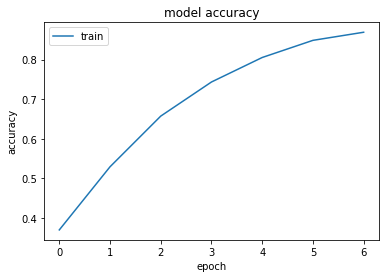

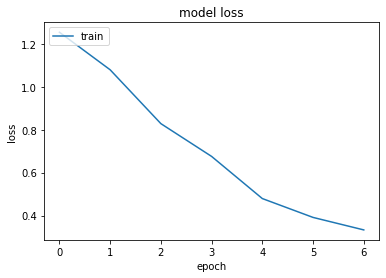

In [82]:
print(model.history.history.keys())
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
#plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
#plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [97]:
text = happy_data_set['text'][0]
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(text)


example = tokenizer.texts_to_sequences(text)

example= pad_sequences(example)
print(example.shape)
predictions = model.predict(example)

(504, 1)


ValueError: Error when checking input: expected embedding_10_input to have shape (3146,) but got array with shape (1,)

In [22]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1
